In [2]:
%matplotlib widget

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#606c38",  # dark-moss-green
    "#283618",  # pakistan-green
    "#fefae0",  # cornsilk
    "#dda15e",  # earth-yellow
    "#bc6c25",  # tigers-eye
]

cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)


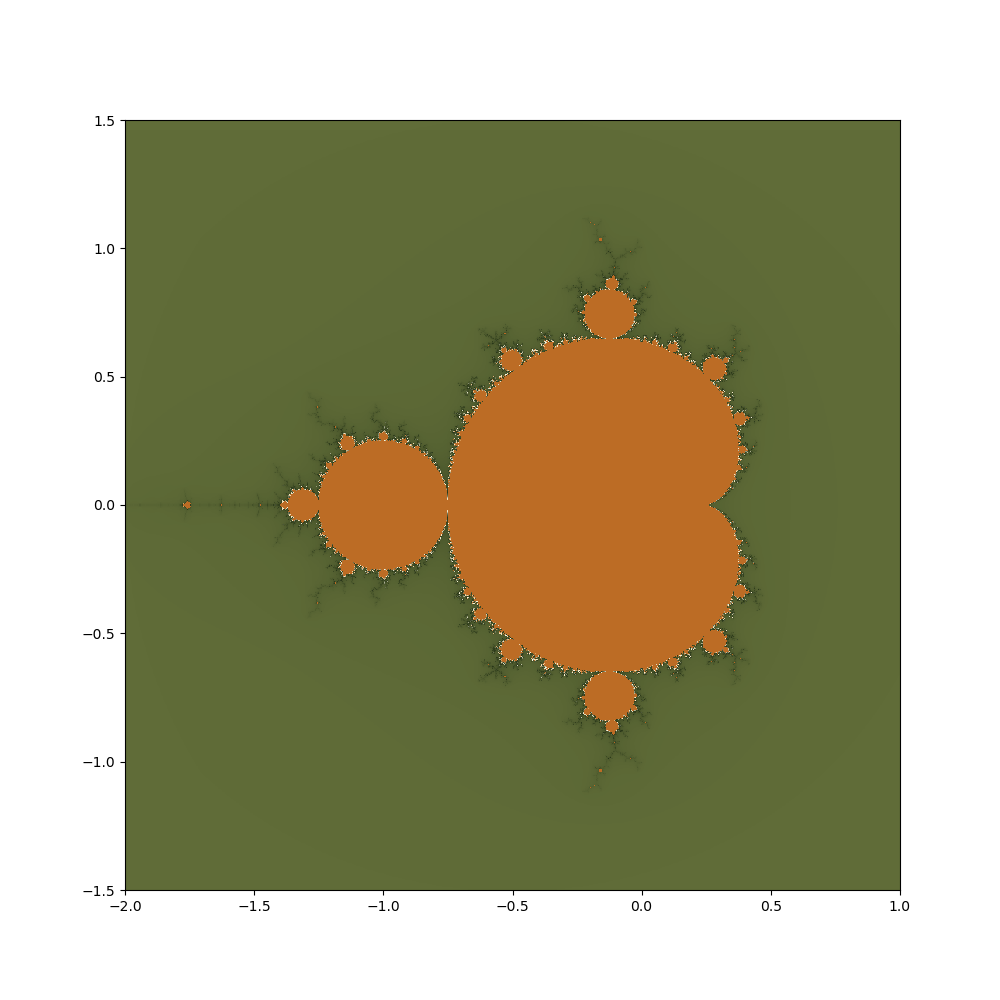

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import matplotlib.patches as patches

plt.ion()

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    if n == max_iter:
        return max_iter
    return n + 1 - np.log(np.log2(abs(z)))

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j*r2[j], max_iter)
    return (r1, r2, n3)

class MandelbrotViewer:
    def __init__(self, xmin, xmax, ymin, ymax, width=10, height=10, max_iter=256):
        self.xmin, self.xmax = xmin, xmax
        self.ymin, self.ymax = ymin, ymax
        self.width, self.height = width, height
        self.max_iter = max_iter
        self.fig, self.ax = plt.subplots(figsize=(width, height))
        self.ax.set_xlim(self.xmin, self.xmax)
        self.ax.set_ylim(self.ymin, self.ymax)
        self.rectangle_selector = RectangleSelector(self.ax, self.on_select, useblit=True,
                                                     button=[1], minspanx=5, minspany=5, spancoords='pixels',
                                                     interactive=True)
        self.draw_fractal()

    def draw_fractal(self):
        x, y, z = mandelbrot_set(self.xmin, self.xmax, self.ymin, self.ymax, self.width*100, self.height*100, self.max_iter)
        self.ax.clear()
        self.ax.set_xlim(self.xmin, self.xmax)
        self.ax.set_ylim(self.ymin, self.ymax)
        self.ax.pcolormesh(x, y, z.T, cmap=cmap, shading='auto')
        self.rectangle_selector.set_active(True)

    def on_select(self, eclick, erelease):
        'eclick and erelease are matplotlib events at press and release'
        self.xmin, self.xmax = sorted([eclick.xdata, erelease.xdata])
        self.ymin, self.ymax = sorted([eclick.ydata, erelease.ydata])
        self.draw_fractal()

xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
viewer = MandelbrotViewer(xmin, xmax, ymin, ymax)


In [ ]:
from numpy import random
import numpy as np

def calculate_area(xmin, xmax, ymin, ymax, z, max_iter):
    in_set = z == max_iter
    proportion = np.sum(in_set) / z.size
    return proportion * (xmax - xmin) * (ymax - ymin)

def iterator(xmin, xmax, ymin, ymax, n_samples, max_iter):
    plt.figure(figsize=(10, 10))
    iterange = range(0, max_iter)
    areas = np.empty(len(iterange))
    for i in iterange:
        areas[i] = random_sampling(xmin, xmax, ymin, ymax, n_samples, i)
    plt.plot(iterange, areas - areas[-1])
    plt.xlabel("Iterations")
    plt.yscale("linear")
    plt.ylim(-0.5, 2)
    plt.ylabel("Area Convergence")
    plt.grid()
    plt.savefig("Mandelbrot area convergence through iterations")

def variance_calculator_random(xmin, xmax, ymin, ymax, n_samples, max_iter, area_samples_taken):
    areas = np.empty(area_samples_taken)
    for i in range(areas.size):
        areas[i] = random_sampling(xmin, xmax, ymin, ymax, n_samples, max_iter)
    return np.var(areas)

def variance_plotter(xmin, xmax, ymin, ymax, n_samples, max_iter, area_samples_taken):
    plt.figure(figsize=(10, 10))
    sample_range = range(1, area_samples_taken+1)
    variances = np.empty(len(sample_range))
    for i in sample_range:
        variances[i-1] = variance_calculator_random(xmin, xmax, ymin, ymax, n_samples, max_iter, i)
    plt.plot(sample_range, variances)
    plt.xlabel("Iterations")
    plt.ylabel("Variance")
    plt.grid()
    plt.savefig("Mandelbrot area variance through iterations")

print("Variance of the area: ", variance_calculator_random(xmin, xmax, ymin, ymax, 1000, 200, 100))
    

In [4]:
def random_sampling(xmin, xmax, ymin, ymax, n_samples, max_iter=256):
    rng = random.default_rng()
    x_samples = rng.random(n_samples) * (xmax - xmin) + xmin
    y_samples = rng.random(n_samples) * (ymax - ymin) + ymin
    z = np.empty(n_samples)
    for i in range(n_samples):
        x = x_samples[i]
        y = y_samples[i]
        z[i] = mandelbrot(x + 1j*y, max_iter)
    area = calculate_area(xmin, xmax, ymin, ymax, z, max_iter)
    return area